In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('combined_data.csv')
df.head()

,Date,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1


In [3]:
df = df.dropna()

In [4]:
group = df.groupby('Date')
Daily_Price = group['open'].mean() 
Daily_Price.head()

Date
2014-09-17    465.864014
2014-09-18    456.859985
2014-09-19    424.102997
2014-09-20    394.673004
2014-09-21    408.084991
Name: open, dtype: float64

In [5]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["close"])

In [6]:
new_df.head()

,close
Date,
2014-09-17,465.864014
2014-09-18,456.859985
2014-09-19,424.102997
2014-09-20,394.673004
2014-09-21,408.084991


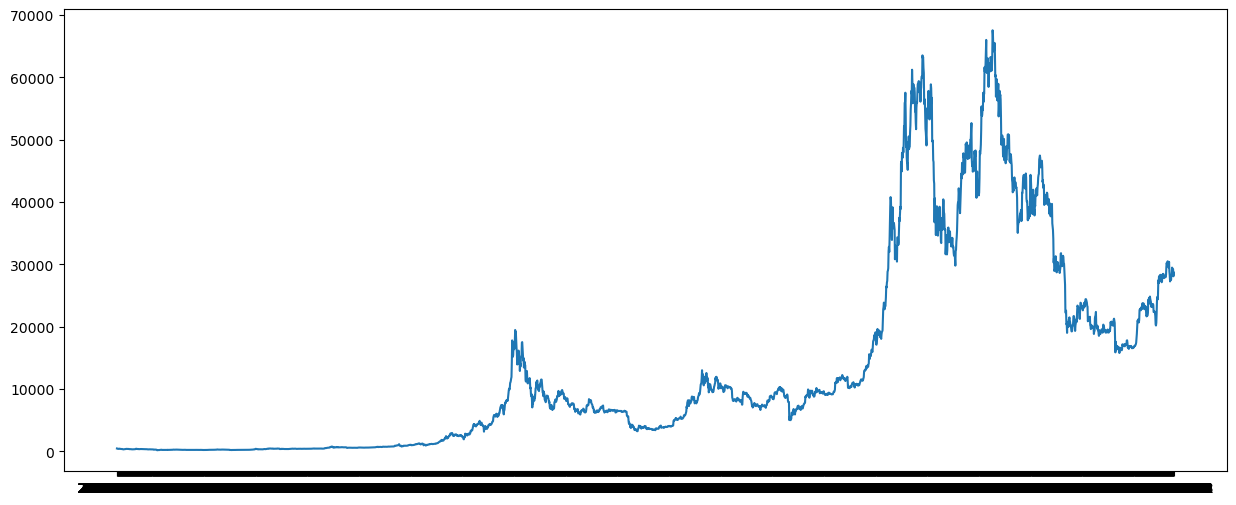

In [7]:
plt.plot(new_df)

In [8]:
# df = df[['Close']]
df=new_df
forecast_out = int(30)

df['Prediction'] = df[['close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.1)

clf = LinearRegression()
clf.fit(X_train,y_train)

cross_validation = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9230874266709216
[27516.00561106 27876.30292489 27881.59500311 27750.48639629
 27636.51126855 27667.16059513 28036.31687796 29304.15674448
 29860.21209082 29534.17985587 30031.46419294 30109.5824839
 29941.41617453 29942.54186873 29107.3030864  30016.67042884
 28505.53779032 27952.8012686  27006.6393241  27536.0876948
 27320.15737267 27246.20546574 28001.70788917 28125.25987436
 29138.0181881  28999.0316012  28911.4229001  28893.70684138
 27796.87289012 28367.76146563]


/tmp/ipykernel_53225/3835854026.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


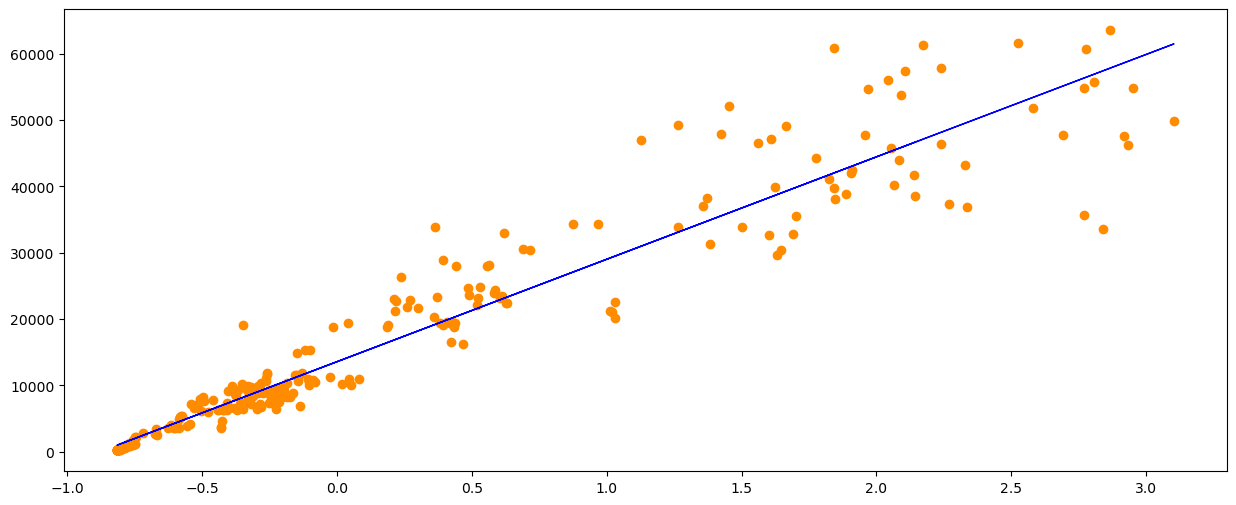

In [9]:


import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='blue', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()



In [10]:
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9230874266709216


In [11]:

forecast_prediction


array([27516.00561106, 27876.30292489, 27881.59500311, 27750.48639629,
       27636.51126855, 27667.16059513, 28036.31687796, 29304.15674448,
       29860.21209082, 29534.17985587, 30031.46419294, 30109.5824839 ,
       29941.41617453, 29942.54186873, 29107.3030864 , 30016.67042884,
       28505.53779032, 27952.8012686 , 27006.6393241 , 27536.0876948 ,
       27320.15737267, 27246.20546574, 28001.70788917, 28125.25987436,
       29138.0181881 , 28999.0316012 , 28911.4229001 , 28893.70684138,
       27796.87289012, 28367.76146563])

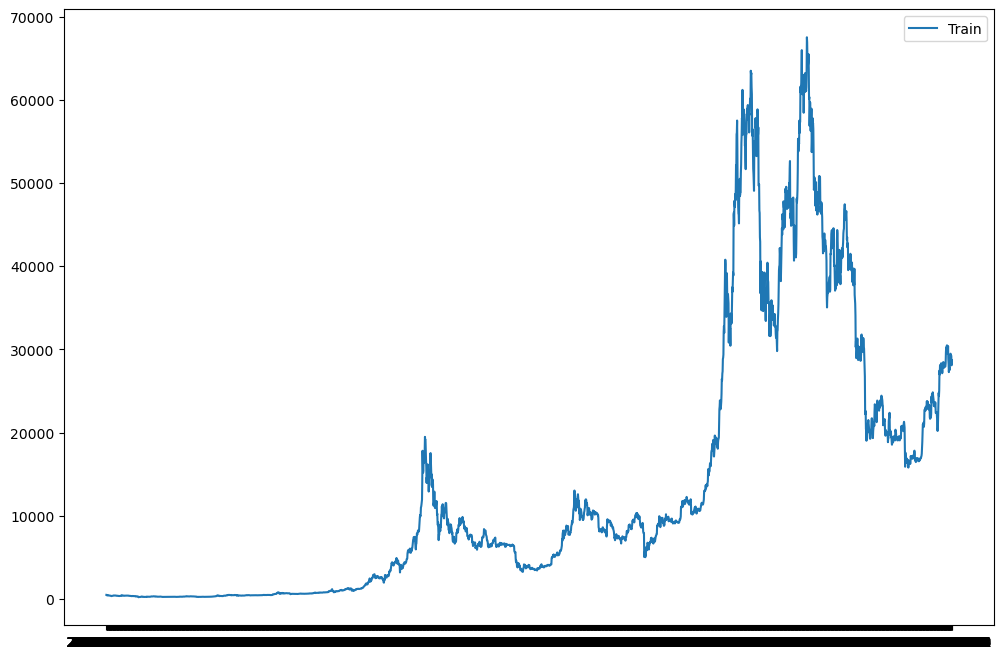

In [17]:


plt.figure(figsize=(12,8))
plt.plot(df['close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()



In [23]:
# removing anamoly from the data

Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['close'] > lower_bound) & (df['close'] < upper_bound)]

In [24]:
# Create the target variable (Prediction) by shifting the 'close' column
forecast_out = 30
df['Prediction'] = df[['close']].shift(-forecast_out)

# Prepare the features and target variables for training
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Train the linear regression model
clf = LinearRegression()
clf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cross_val_score = clf.predict(X_test)
confidence = clf.score(X_test, y_test)
print("Cross-validation score: ", cross_val_score)



Cross-validation score:  [10645.86254909 36988.82140474  2736.08929969   873.99056163
  1349.86319344   936.95261999 33874.80353938 11720.98913552
 32625.86250258  6566.96436026  8833.73904231   799.33813451
  3103.90419271  1205.71202279  8640.07385839 41186.75613642
 45880.64031956   806.10121719  7343.67223841  1440.40826058
  5138.14479479  9184.55396869 20162.19848671   803.67742765
  1227.87403667  1238.4769203  19359.44150339   787.99860998
   923.17379458   801.04080932  7991.5847686  10623.21585737
   836.05643952 12096.37166989  2326.28069995   835.78530228
 11874.34639705 10409.96757745   814.37843615 22705.4707488
  7220.91012401  3428.3259763   2081.73496161 21367.29441982
  9627.03855002 43821.14854233  7172.88152284 23050.35873738
  6957.82146962  9362.47314379  1299.46518144  7165.69944089
   805.6706808    836.65026032   978.19199458  1126.70479117
 16814.53684209  5984.93242483  9230.66260266  9550.27877383
 42547.20142753 19468.22952136  6053.40113159  1451.53491183


/tmp/ipykernel_47518/3167808354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['close']].shift(-forecast_out)
/tmp/ipykernel_47518/3167808354.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


In [25]:
print("Model confidence: ", confidence)

# Make predictions on the forecast data
forecast_prediction = clf.predict(X_forecast)
print("Forecast prediction: ", forecast_prediction)

Model confidence:  0.9572285737391214
Forecast prediction:  [27581.50600707 27945.41714077 27950.76229909 27818.33865919
 27703.22034896 27734.1770915  28107.03605059 29387.59248402
 29949.22512384 29619.92275136 30122.19490252 30201.09672813
 30031.24369304 30032.38067806 29188.76436309 30107.25275541
 28580.96329794 28022.6827709  27067.0307228  27601.78951623
 27383.6933903  27308.99973799 28072.07993001 28196.87115457
 29219.78754048 29079.40690354 28990.91947797 28973.02572532
 27865.19041442 28441.80506226]


In [12]:
clf

LinearRegression()